In [ ]:
pip install nltk

In [3]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [4]:
# Install and download necessary NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\princ_vn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\princ_vn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
pip install vaderSentiment

In [ ]:
pip install wordcloud

In [9]:
import pandas as pd
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [16]:
# Function to preprocess the tweets
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = text.lower()
    text_tokens = word_tokenize(text)
    filtered_words = [word for word in text_tokens if word not in stopwords.words('english')]
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in filtered_words]
    return " ".join(stemmed_words)

In [17]:
# Load the dataset
data_train = pd.read_csv('Tweet/twitter_training.csv')
data_val = pd.read_csv('Tweet/twitter_validation.csv')

In [18]:
data_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [19]:
data_val

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [21]:
print(data_train.columns)
print(data_val.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [22]:
# Assuming the column name is 'text' instead of 'tweet' (adjust if needed)
tweet_column = 'text'  # Replace with the correct column name if different

In [26]:
data_train.columns = ['id', 'game', 'sentiment', 'text']
data_val.columns = ['id', 'game', 'sentiment', 'text']

In [30]:
data_train

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [31]:
data_val

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [38]:
id_types = data_train['id'].value_counts()
id_types

id
5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: count, Length: 12447, dtype: int64

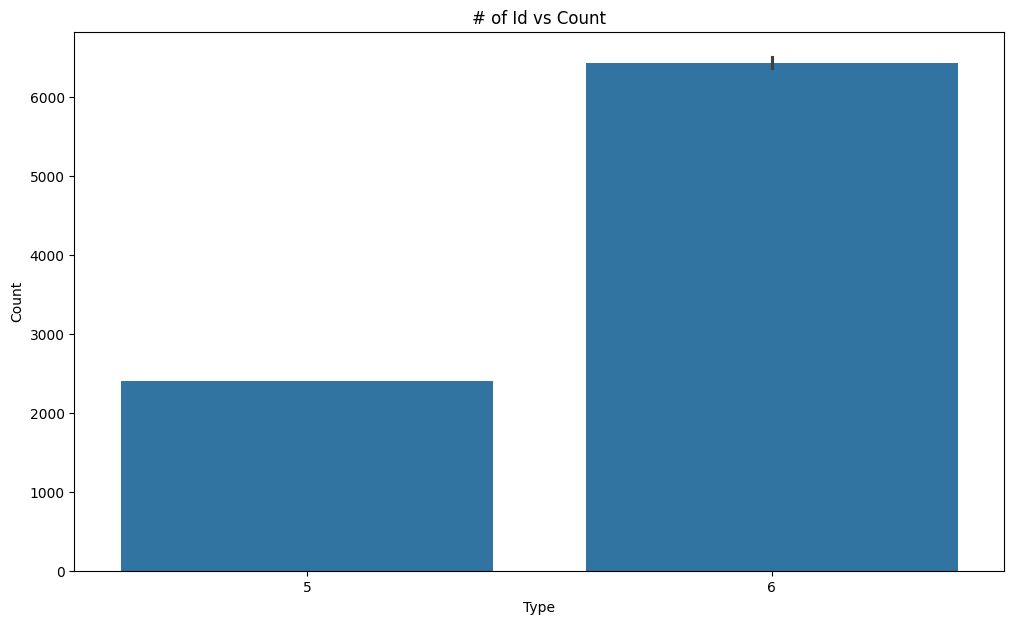

In [39]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [41]:
game_types = data_train['game'].value_counts()
game_types

game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

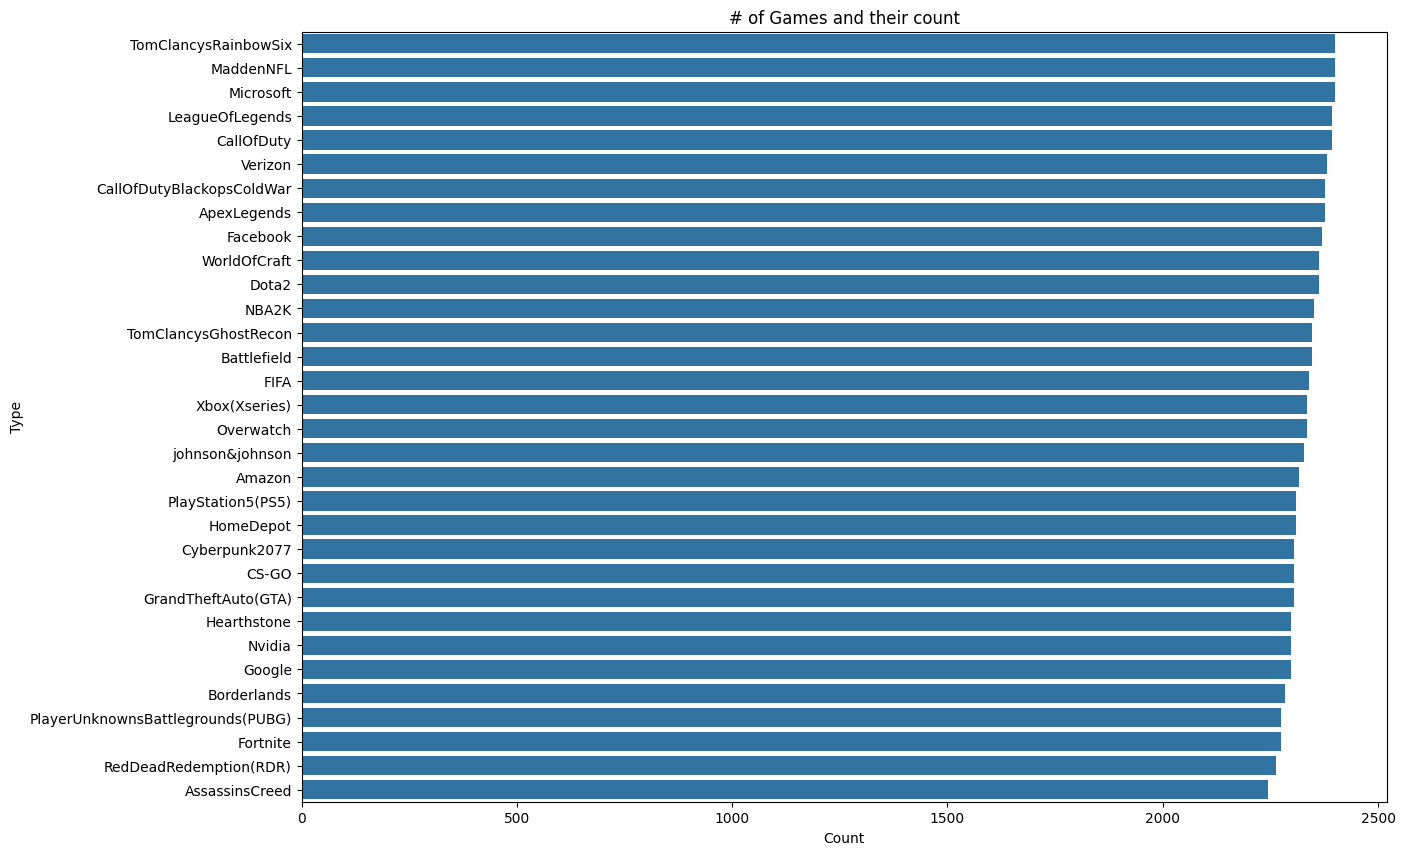

In [42]:
plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index)  
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

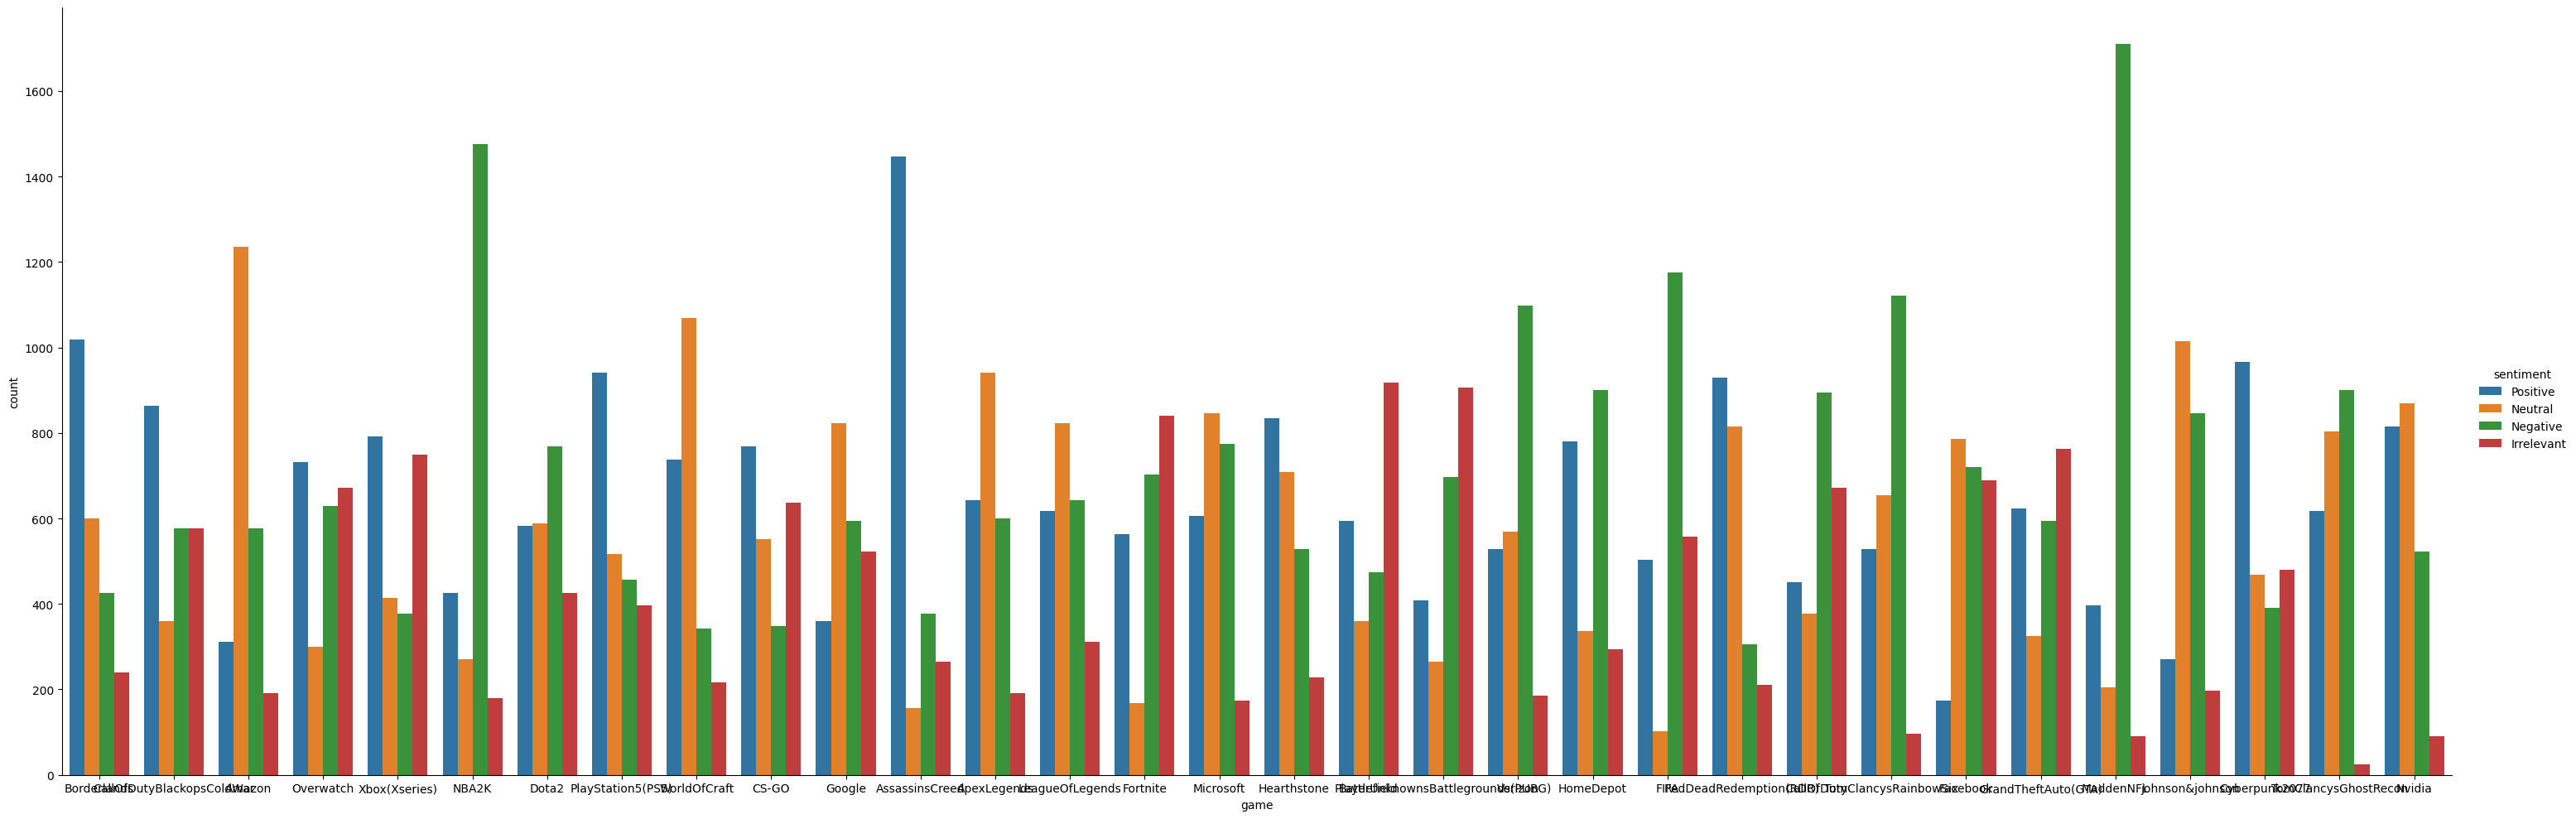

In [44]:
sns.catplot(x="game",hue="sentiment", kind="count",height=10,aspect=3, data=data_train)

<Axes: >

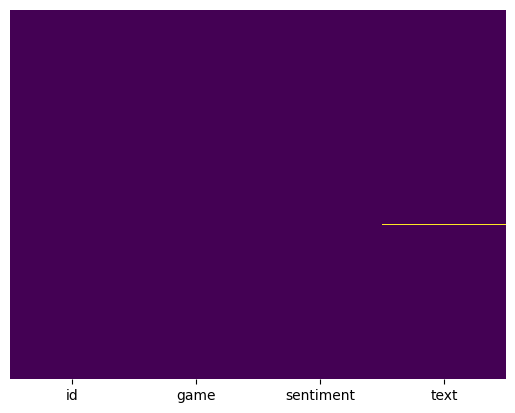

In [46]:
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
total_null=data_train.isnull().sum().sort_values(ascending=False)
percent = ((data_train.isnull().sum()/data_train.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data_train.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  74681


,Total Missing,In Percent
text,686,0.92
id,0,0.00
game,0,0.00
sentiment,0,0.00


In [49]:
data_train.dropna(subset=['text'],inplace=True)

total_null=data_train.isnull().sum().sort_values(ascending=False)
percent = ((data_train.isnull().sum()/data_train.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data_train.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  73995


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [54]:
train0=data_train[data_train['sentiment']=="Negative"]
train1=data_train[data_train['sentiment']=="Positive"]
train2=data_train[data_train['sentiment']=="Irrelevant"]
train3=data_train[data_train['sentiment']=="Neutral"]

In [55]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [56]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [57]:
data_train=pd.concat([train0,train1,train2,train3],axis=0)
data_train

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
5603,165,Amazon,Neutral,An amazing read aloud book for you and your ch...
5604,165,Amazon,Neutral,An amazing reading book for you and your child...
5605,165,Amazon,Neutral,An amazing book to read aloud for you and your...
5606,165,Amazon,Neutral,An amazing read aloud book for you and your ch...


In [60]:
id_types = data_train['id'].value_counts()
id_types

id
2405    6
1810    6
1748    6
1754    6
1760    6
       ..
1602    3
1880    3
333     3
9388    2
9267    2
Name: count, Length: 1040, dtype: int64

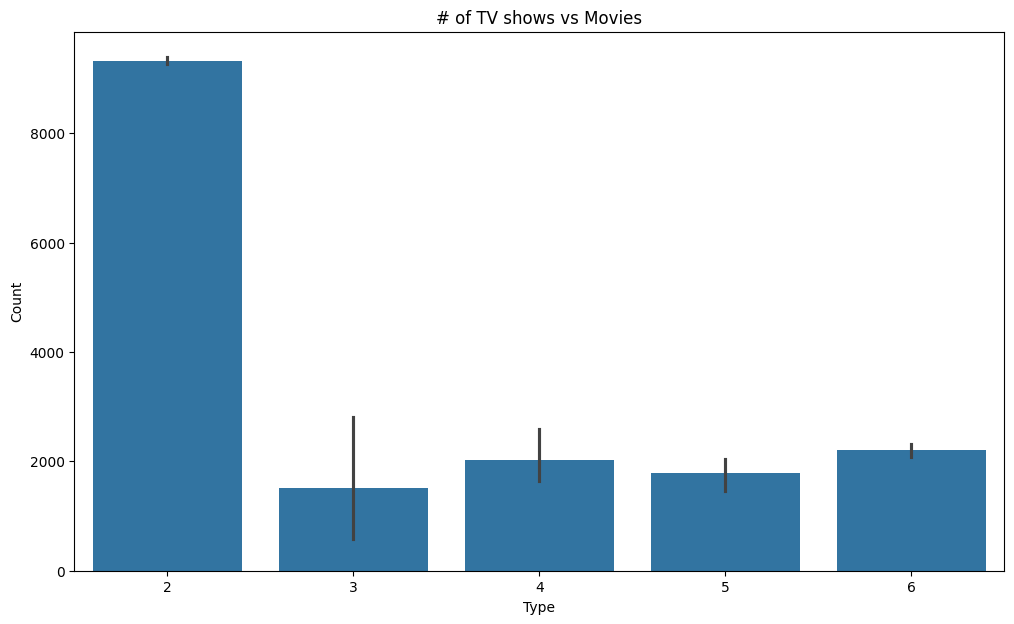

In [61]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [62]:
game_types = data_train['game'].value_counts()
game_types

game
Borderlands                  2279
CallOfDutyBlackopsColdWar    2192
Amazon                       1321
Overwatch                     373
Name: count, dtype: int64

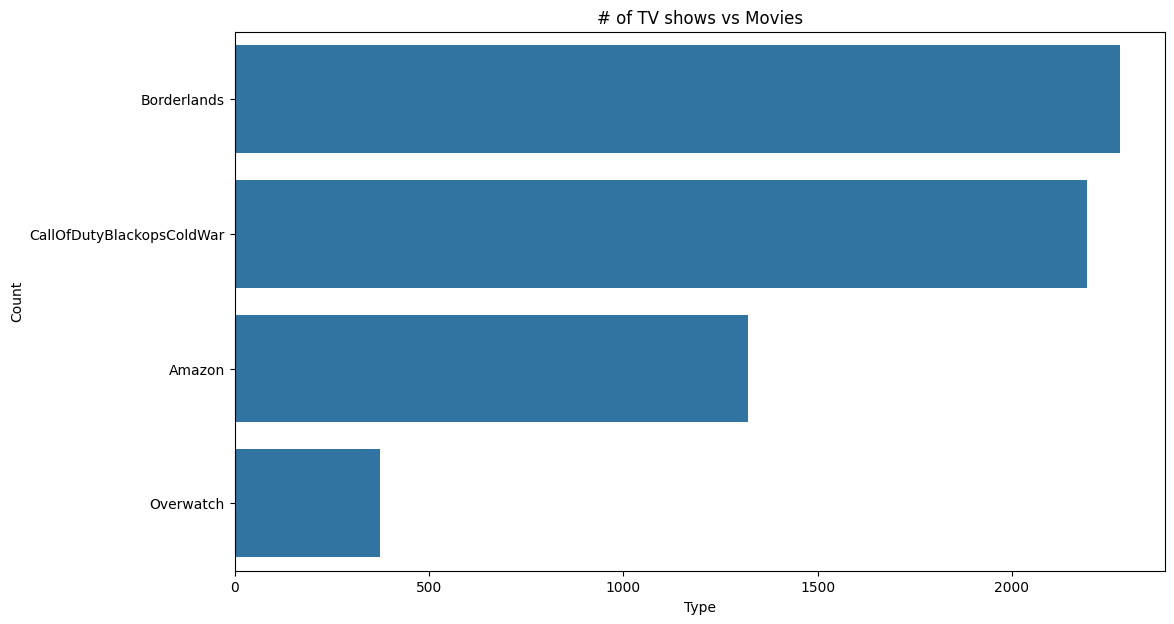

In [63]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [64]:
sentiment_types = data_train['sentiment'].value_counts()
sentiment_types

sentiment
Negative      1863
Positive      1721
Neutral       1509
Irrelevant    1072
Name: count, dtype: int64

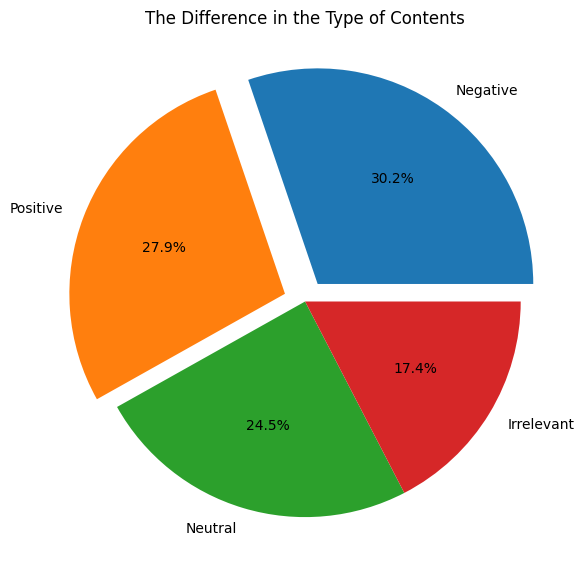

In [65]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

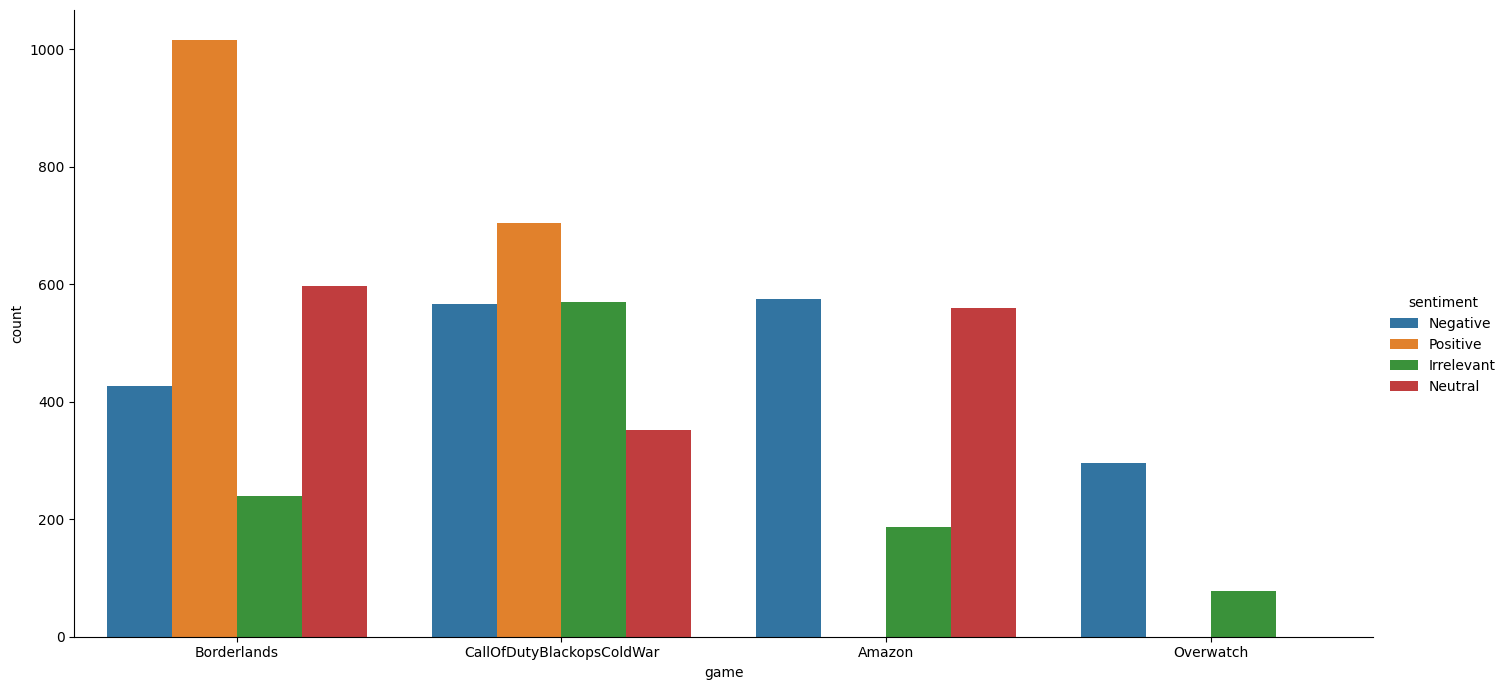

In [66]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=data_train)

In [67]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [70]:
data_train['sentiment']=label_encoder.fit_transform(data_train['sentiment'])
data_train['game']=label_encoder.fit_transform(data_train['game'])
data_val['sentiment']=label_encoder.fit_transform(data_val['sentiment'])
data_val['game']=label_encoder.fit_transform(data_val['game'])

In [77]:
data_train.nunique()

game            4
sentiment       4
text         5854
dtype: int64

In [78]:
data_val.nunique()

game          32
sentiment      4
text         998
dtype: int64

In [86]:
tweet_column = 'text'

In [87]:
data_train['cleaned_tweet'] = data_train[tweet_column].apply(preprocess_text)
data_val['cleaned_tweet'] = data_val[tweet_column].apply(preprocess_text)

In [88]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [89]:
# Analyze sentiment for training data
data_train['sentiment'] = data_train['cleaned_tweet'].apply(lambda x: analyzer.polarity_scores(x))
data_train['compound'] = data_train['sentiment'].apply(lambda x: x['compound'])
data_train['sentiment_category'] = data_train['compound'].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))

In [90]:
# Analyze sentiment for validation data
data_val['sentiment'] = data_val['cleaned_tweet'].apply(lambda x: analyzer.polarity_scores(x))
data_val['compound'] = data_val['sentiment'].apply(lambda x: x['compound'])
data_val['sentiment_category'] = data_val['compound'].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))

In [92]:
# Aggregate sentiment counts for training data
train_sentiment_counts = data_train['sentiment_category'].value_counts()

In [93]:
# Aggregate sentiment counts for validation data
val_sentiment_counts = data_val['sentiment_category'].value_counts()

C:\Users\princ_vn\AppData\Local\Temp\ipykernel_31360\3138983621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_sentiment_counts.index, y=train_sentiment_counts.values, palette='viridis')


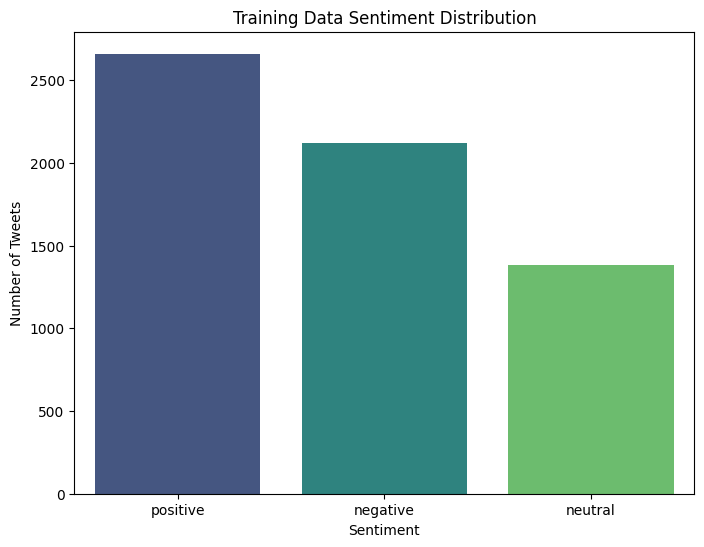

In [96]:
# Plot sentiment distribution for training data
plt.figure(figsize=(8, 6))
sns.barplot(x=train_sentiment_counts.index, y=train_sentiment_counts.values, palette='viridis')
plt.title('Training Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

C:\Users\princ_vn\AppData\Local\Temp\ipykernel_31360\2922240094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_sentiment_counts.index, y=val_sentiment_counts.values, palette='viridis')


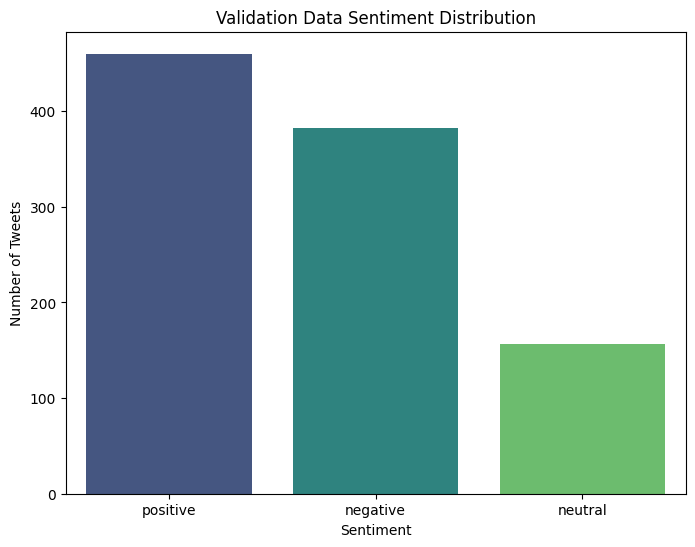

In [102]:
# Plot sentiment distribution for validation data
plt.figure(figsize=(8, 6))
sns.barplot(x=val_sentiment_counts.index, y=val_sentiment_counts.values, palette='viridis')
plt.title('Validation Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

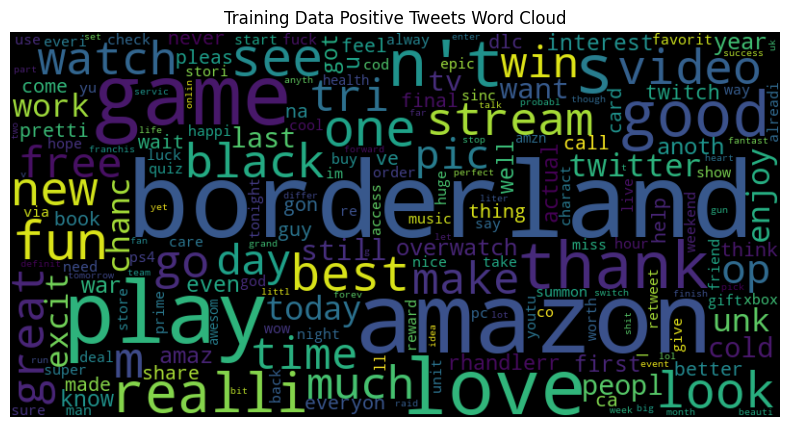

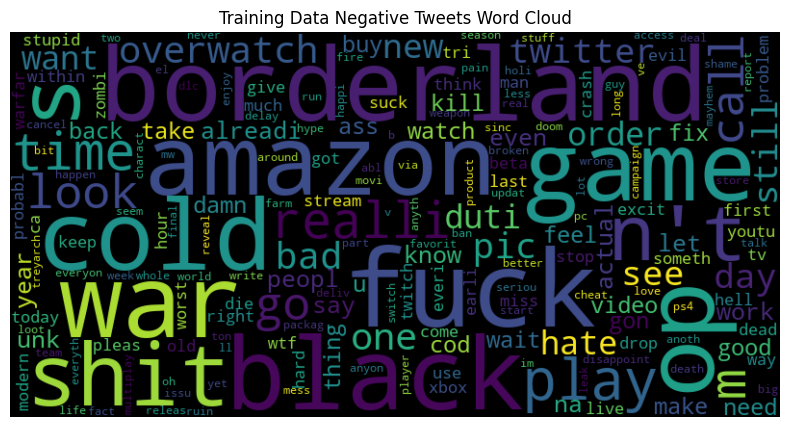

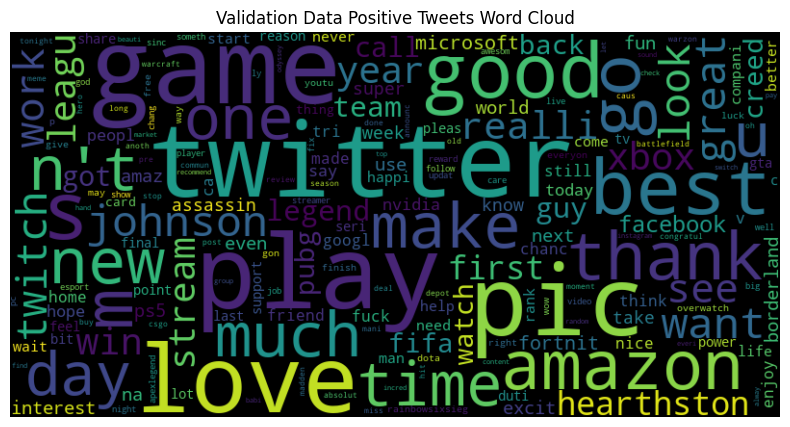

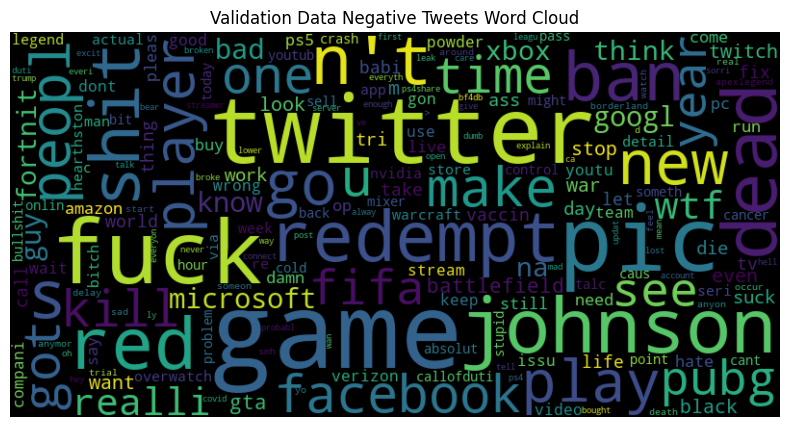

In [105]:
# Word Cloud for positive and negative tweets in training data
positive_tweets_train = data_train[data_train['sentiment_category'] == 'positive']['cleaned_tweet'].str.cat(sep=' ')
negative_tweets_train = data_train[data_train['sentiment_category'] == 'negative']['cleaned_tweet'].str.cat(sep=' ')

# Positive Word Cloud for training data
plt.figure(figsize=(10, 5))
wordcloud_pos_train = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(positive_tweets_train)
plt.imshow(wordcloud_pos_train, interpolation='bilinear')
plt.title('Training Data Positive Tweets Word Cloud')
plt.axis('off')
plt.show()

# Negative Word Cloud for training data
plt.figure(figsize=(10, 5))
wordcloud_neg_train = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(negative_tweets_train)
plt.imshow(wordcloud_neg_train, interpolation='bilinear')
plt.title('Training Data Negative Tweets Word Cloud')
plt.axis('off')
plt.show()

# Word Cloud for positive and negative tweets in validation data
positive_tweets_val = data_val[data_val['sentiment_category'] == 'positive']['cleaned_tweet'].str.cat(sep=' ')
negative_tweets_val = data_val[data_val['sentiment_category'] == 'negative']['cleaned_tweet'].str.cat(sep=' ')

# Positive Word Cloud for validation data
plt.figure(figsize=(10, 5))
wordcloud_pos_val = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(positive_tweets_val)
plt.imshow(wordcloud_pos_val, interpolation='bilinear')
plt.title('Validation Data Positive Tweets Word Cloud')
plt.axis('off')
plt.show()

# Negative Word Cloud for validation data
plt.figure(figsize=(10, 5))
wordcloud_neg_val = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(negative_tweets_val)
plt.imshow(wordcloud_neg_val, interpolation='bilinear')
plt.title('Validation Data Negative Tweets Word Cloud')
plt.axis('off')
plt.show()